# Find the top 10 drivers with the most fastest laps in all circuits 

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt 
import math

In [2]:
#load datasts 
drivers =pd.read_csv("Datasets/formula1/drivers.csv", encoding = 'latin1')
laptimes =pd.read_csv("Datasets/formula1/lapTimes.csv")
races = pd.read_csv('Datasets/formula1/races.csv')
circuits = pd.read_csv('Datasets/formula1/circuits.csv', encoding='latin1')

drivers.head(4)

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,10/05/1977,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6.0,ROS,Nico,Rosberg,27/06/1985,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14.0,ALO,Fernando,Alonso,29/07/1981,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso


In [3]:
laptimes.head(2)

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006


In [4]:
#new table for names and Id 
driverId_ref = drivers[['forename','surname','driverId']]

#merge table based on drivers Id 
laptimes = laptimes.merge(driverId_ref, on ='driverId')
laptimes.head(2)



,raceId,driverId,lap,position,time,milliseconds,forename,surname
0,841,20,1,1,1:38.109,98109,Sebastian,Vettel
1,841,20,2,1,1:33.006,93006,Sebastian,Vettel


In [5]:
del driverId_ref
laptimes.head(2)

,raceId,driverId,lap,position,time,milliseconds,forename,surname
0,841,20,1,1,1:38.109,98109,Sebastian,Vettel
1,841,20,2,1,1:33.006,93006,Sebastian,Vettel


In [50]:
#Concatenate the names
laptimes['driverName'] = laptimes['forename'].str.cat(laptimes['surname'], sep=' ')

In [7]:
laptimes.head(2)

,raceId,driverId,lap,position,time,milliseconds,forename,surname,driverName
0,841,20,1,1,1:38.109,98109,Sebastian,Vettel,Sebastian Vettel
1,841,20,2,1,1:33.006,93006,Sebastian,Vettel,Sebastian Vettel


In [51]:

laptimes_per_driver = laptimes.drop(['driverId','lap','position','time'],axis=1,inplace=False)
laptimes_per_driver.head(2)

,raceId,milliseconds,forename,surname,driverName
0,841,98109,Sebastian,Vettel,Sebastian Vettel
1,841,93006,Sebastian,Vettel,Sebastian Vettel


In [52]:
#merge laptimes and circuit id 
raceId_circuitId = races[['raceId', 'circuitId']]
laptimes_per_driver = laptimes_per_driver.merge(raceId_circuitId, on = 'raceId')

In [53]:
del raceId_circuitId
laptimes_per_driver.head(4)


,raceId,milliseconds,forename,surname,driverName,circuitId
0,841,98109,Sebastian,Vettel,Sebastian Vettel,1
1,841,93006,Sebastian,Vettel,Sebastian Vettel,1
2,841,92713,Sebastian,Vettel,Sebastian Vettel,1
3,841,92803,Sebastian,Vettel,Sebastian Vettel,1


In [54]:
circuitId_name = circuits[['circuitId', 'name']]
circuitId_name.head(2)

,circuitId,name
0,1,Albert Park Grand Prix Circuit
1,2,Sepang International Circuit


In [55]:
#merge circuitname and driver's laptimes 
laptimes_per_driver = laptimes_per_driver.merge(circuitId_name, on = 'circuitId')
del circuitId_name

In [28]:
laptimes_per_driver.head(2)

,raceId,milliseconds,forename,surname,driverName,circuitId,name
0,841,98109,Sebastian,Vettel,Sebastian Vettel,1,Albert Park Grand Prix Circuit
1,841,93006,Sebastian,Vettel,Sebastian Vettel,1,Albert Park Grand Prix Circuit


In [56]:
laptimes_per_driver.drop(['raceId', 'circuitId'], inplace = True, axis = 1)


In [66]:
laptimes_per_driver[laptimes_per_driver.surname == 'Button'].head(2)

,milliseconds,forename,surname,driverName,name
290,104722,Jenson,Button,Jenson Button,Albert Park Grand Prix Circuit
291,94139,Jenson,Button,Jenson Button,Albert Park Grand Prix Circuit


In [70]:
laptimes_per_driver.surname.unique()

array(['Vettel', 'Hamilton', 'Webber', 'Petrov', 'Massa', 'Button',
       'Rosberg', 'Kobayashi', 'Alonso', 'di Resta', 'Buemi', 'Sutil',
       'Heidfeld', 'PÌ©rez', 'Kovalainen', 'Maldonado', 'Trulli',
       "d'Ambrosio", 'Glock', 'Barrichello', 'Alguersuari', 'Schumacher',
       'Ricciardo', 'Senna', 'Grosjean', 'RÌ_ikkÌ¦nen', 'Vergne', 'Pic',
       'GutiÌ©rrez', 'van der Garde', 'Bianchi', 'Chilton', 'Bottas',
       'HÌ_lkenberg', 'Magnussen', 'Kvyat', 'Ericsson', 'Sainz', 'Nasr',
       'Verstappen', 'Palmer', 'Wehrlein', 'Haryanto', 'Fisichella',
       'Kubica', 'Nakajima', 'Piquet Jr.', 'Bourdais', 'Liuzzi',
       'de la Rosa', 'Chandhok', 'di Grassi', 'Vandoorne', 'Ocon',
       'Stroll', 'Giovinazzi', 'Coulthard', 'Wurz', 'Sato', 'Davidson',
       'Albers', 'Speed', 'Irvine', 'Villeneuve', 'Frentzen', 'Salo',
       'Pablo Montoya', 'Bernoldi', 'Yoong', 'Panis', 'Firman',
       'Pizzonia', 'Wilson', 'da Matta', 'Baumgartner', 'Klien',
       'Pantano', 'Bruni', 'Karth

In [80]:
#rename circuits
laptimes_per_driver.rename(columns={'name': 'circuitName'}, inplace = True)
laptimes_per_driver[laptimes_per_driver.surname == 'Sutil'].head(2)

,driverName,circuitName,milliseconds,forename,surname
0,Adrian Sutil,Albert Park Grand Prix Circuit,88687,Adrian,Sutil
1,Adrian Sutil,Autodromo Nazionale di Monza,84739,Adrian,Sutil


In [81]:
laptimes_per_driver = laptimes_per_driver.groupby(by=['driverName', 'circuitName']).min().reset_index()
laptimes_per_driver.head(2)

,driverName,circuitName,milliseconds,forename,surname
0,Adrian Sutil,Albert Park Grand Prix Circuit,88687,Adrian,Sutil
1,Adrian Sutil,Autodromo Nazionale di Monza,84739,Adrian,Sutil


In [118]:
#create a column of all unique ciricuits in F1
unique_cirucits = pd.DataFrame(laptimes_per_driver['circuitName'].unique(), columns=['circuit'])

In [119]:
listOfCircuits = unique_cirucits['circuit'].tolist()
listofCircuits
fastest =[]

In [141]:
def driverTimesByCircuit(circuit):
    df = laptimes_per_driver[laptimes_per_driver['circuitName'] == circuit]
    df.sort_values('milliseconds', inplace=True)
    return df.iloc[0]

for circuit in listOfCircuits:
    fastest.append(driverTimesByCircuit(circuit))

fastest = pd.DataFrame(fastest)


C:\Users\diksh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\diksh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\diksh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

C:\Users\diksh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\diksh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\diksh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

In [123]:
#convert time format
fastest['time'] = fastest['milliseconds'].apply(lambda x: str(math.floor(x/60000))+':'+str(math.floor(x%60000/1000)).zfill(2)+':'+str(x%1000).zfill(3))
fastest.drop(['milliseconds'], inplace=True, axis=1)

In [136]:
fastest.sort_values(by='time', inplace=True)
fastest.reset_index(drop=True, inplace=True)
fastest

,driverName,circuitName,forename,surname,time
0,Lewis Hamilton,Red Bull Ring,Lewis,Hamilton,1:07:411
1,Michael Schumacher,A1-Ring,Michael,Schumacher,1:08:337
2,Rubens Barrichello,Indianapolis Motor Speedway,Rubens,Barrichello,1:10:399
3,Max Verstappen,AutÌ_dromo JosÌ© Carlos Pace,Max,Verstappen,1:11:044
4,Rubens Barrichello,Circuit Gilles Villeneuve,Rubens,Barrichello,1:13:622
5,Kimi RÌ_ikkÌ¦nen,Hockenheimring,Kimi,RÌ_ikkÌ¦nen,1:13:780
6,Michael Schumacher,Circuit de Monaco,Michael,Schumacher,1:14:439
7,David Coulthard,Circuit de Nevers Magny-Cours,David,Coulthard,1:15:045
8,Giancarlo Fisichella,Circuit de Barcelona-Catalunya,Giancarlo,Fisichella,1:15:641
9,Michael Schumacher,Hungaroring,Michael,Schumacher,1:16:207


In [125]:
fastest

,driverName,circuitName,forename,surname,time
0,Lewis Hamilton,Red Bull Ring,Lewis,Hamilton,1:07:411
1,Michael Schumacher,A1-Ring,Michael,Schumacher,1:08:337
2,Rubens Barrichello,Indianapolis Motor Speedway,Rubens,Barrichello,1:10:399
3,Max Verstappen,AutÌ_dromo JosÌ© Carlos Pace,Max,Verstappen,1:11:044
4,Rubens Barrichello,Circuit Gilles Villeneuve,Rubens,Barrichello,1:13:622
5,Kimi RÌ_ikkÌ¦nen,Hockenheimring,Kimi,RÌ_ikkÌ¦nen,1:13:780
6,Michael Schumacher,Circuit de Monaco,Michael,Schumacher,1:14:439
7,David Coulthard,Circuit de Nevers Magny-Cours,David,Coulthard,1:15:045
8,Giancarlo Fisichella,Circuit de Barcelona-Catalunya,Giancarlo,Fisichella,1:15:641
9,Michael Schumacher,Hungaroring,Michael,Schumacher,1:16:207


In [126]:
most_fast_laps = fastest['driverName'].value_counts().reset_index()
most_fast_laps.rename(columns={'index':'Driver','driverName': '# Fastest Laps Held'}, inplace=True)

In [127]:
most_fast_laps = most_fast_laps.iloc[:10]

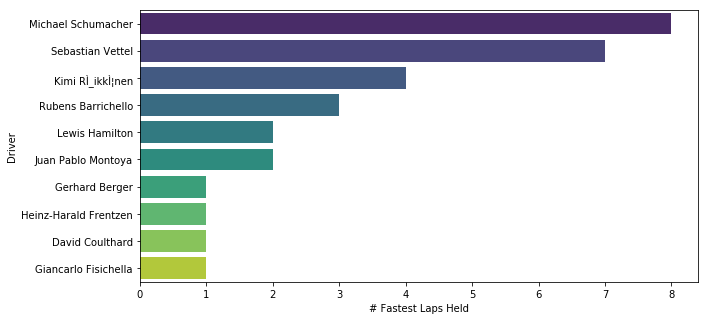

In [131]:
#top 10 most laps held
fig,ax = plt.subplots(figsize=(10,5))
g = sns.barplot(data=most_fast_laps, y='Driver', x='# Fastest Laps Held', palette='viridis')